# Projecte Data Mining
Daniel Mariño i Gabriel Guardiola

In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

## Preprocessing

In [2]:
# Initzialicem les dades 
dset = pd.read_csv('train.csv')
dset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
dset.shape

(103904, 25)

El nostre dataset té 103.904 entrades y 25 columnes sense preprocessar.

In [4]:
dset.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Podem observar dades interesants com el retard d'arribada mig (15 minuts) o el de sortida (14 minuts)

### Neteja de dades

Tenim que transformar les dades de text en valors numerics per poder treballar amb el dataset. 

El format serà el següent:

Gènere: Farem què Home → 0 i Dona  → 1

Tipus de client: Client deslleial → 0 i el lleial → 1

Tipus de viatge: Viatge personal → 0 i viatge de negocis → 1

Classe: Business → 0, Eco → 1, Eco plus → 2

Satisfacció: Neutral o insatisfet → 0 i satisfet → 1


In [5]:
gender_mapping = {'Male': 0, 'Female': 1}
dset['Gender'] = dset['Gender'].map(gender_mapping)


customer_type_mapping = {'Loyal Customer': 1, 'disloyal Customer': 0}
dset['Customer Type'] = dset['Customer Type'].map(customer_type_mapping)

type_of_travel_mapping = {'Personal Travel': 0, 'Business travel': 1}
dset['Type of Travel'] = dset['Type of Travel'].map(type_of_travel_mapping)


class_mapping = {'Business': 0, 'Eco': 1, 'Eco Plus': 2}
dset['Class'] = dset['Class'].map(class_mapping)


satisfaction_mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}
dset['satisfaction'] = dset['satisfaction'].map(satisfaction_mapping)


dset.to_csv('satisfaction.csv', index=False)

#treballem amb el nou csv
dset = pd.read_csv('satisfaction.csv')
dset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,0,1,13,0,2,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,0,0,25,1,0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,1,1,26,1,0,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,1,1,25,1,0,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,0,1,61,1,0,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


Comprobem si hi han "missing values" (null)

In [6]:
dset.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

L' única columna amb valors nuls és la de retards d' arribada, amb un total de 310. 
Les substituïm per zero

In [7]:
dset['Arrival Delay in Minutes'] = dset['Arrival Delay in Minutes'].fillna(0)

#Comprobem:
dset.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

En aquesta mateixa columna, em detectat que el data type es float quan hauria de ser integer.

In [10]:
dset['Arrival Delay in Minutes'] = dset['Arrival Delay in Minutes'].astype('int64')

Eliminem la primera columna ja que no serveix per res

In [8]:
dset = dset.drop(dset.columns[0], axis=1)
#comprobem
dset.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,1,13,0,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,0,0,25,1,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,1,1,26,1,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,1,1,25,1,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,0,1,61,1,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [11]:
#guardem les dades preprocessades al csv
dset.to_csv('satisfaction.csv', index=False)

### Correlació de les dades

Per fer-nos una idea de la correlació que les dades tenen entre si, generarem un mapa de calor:

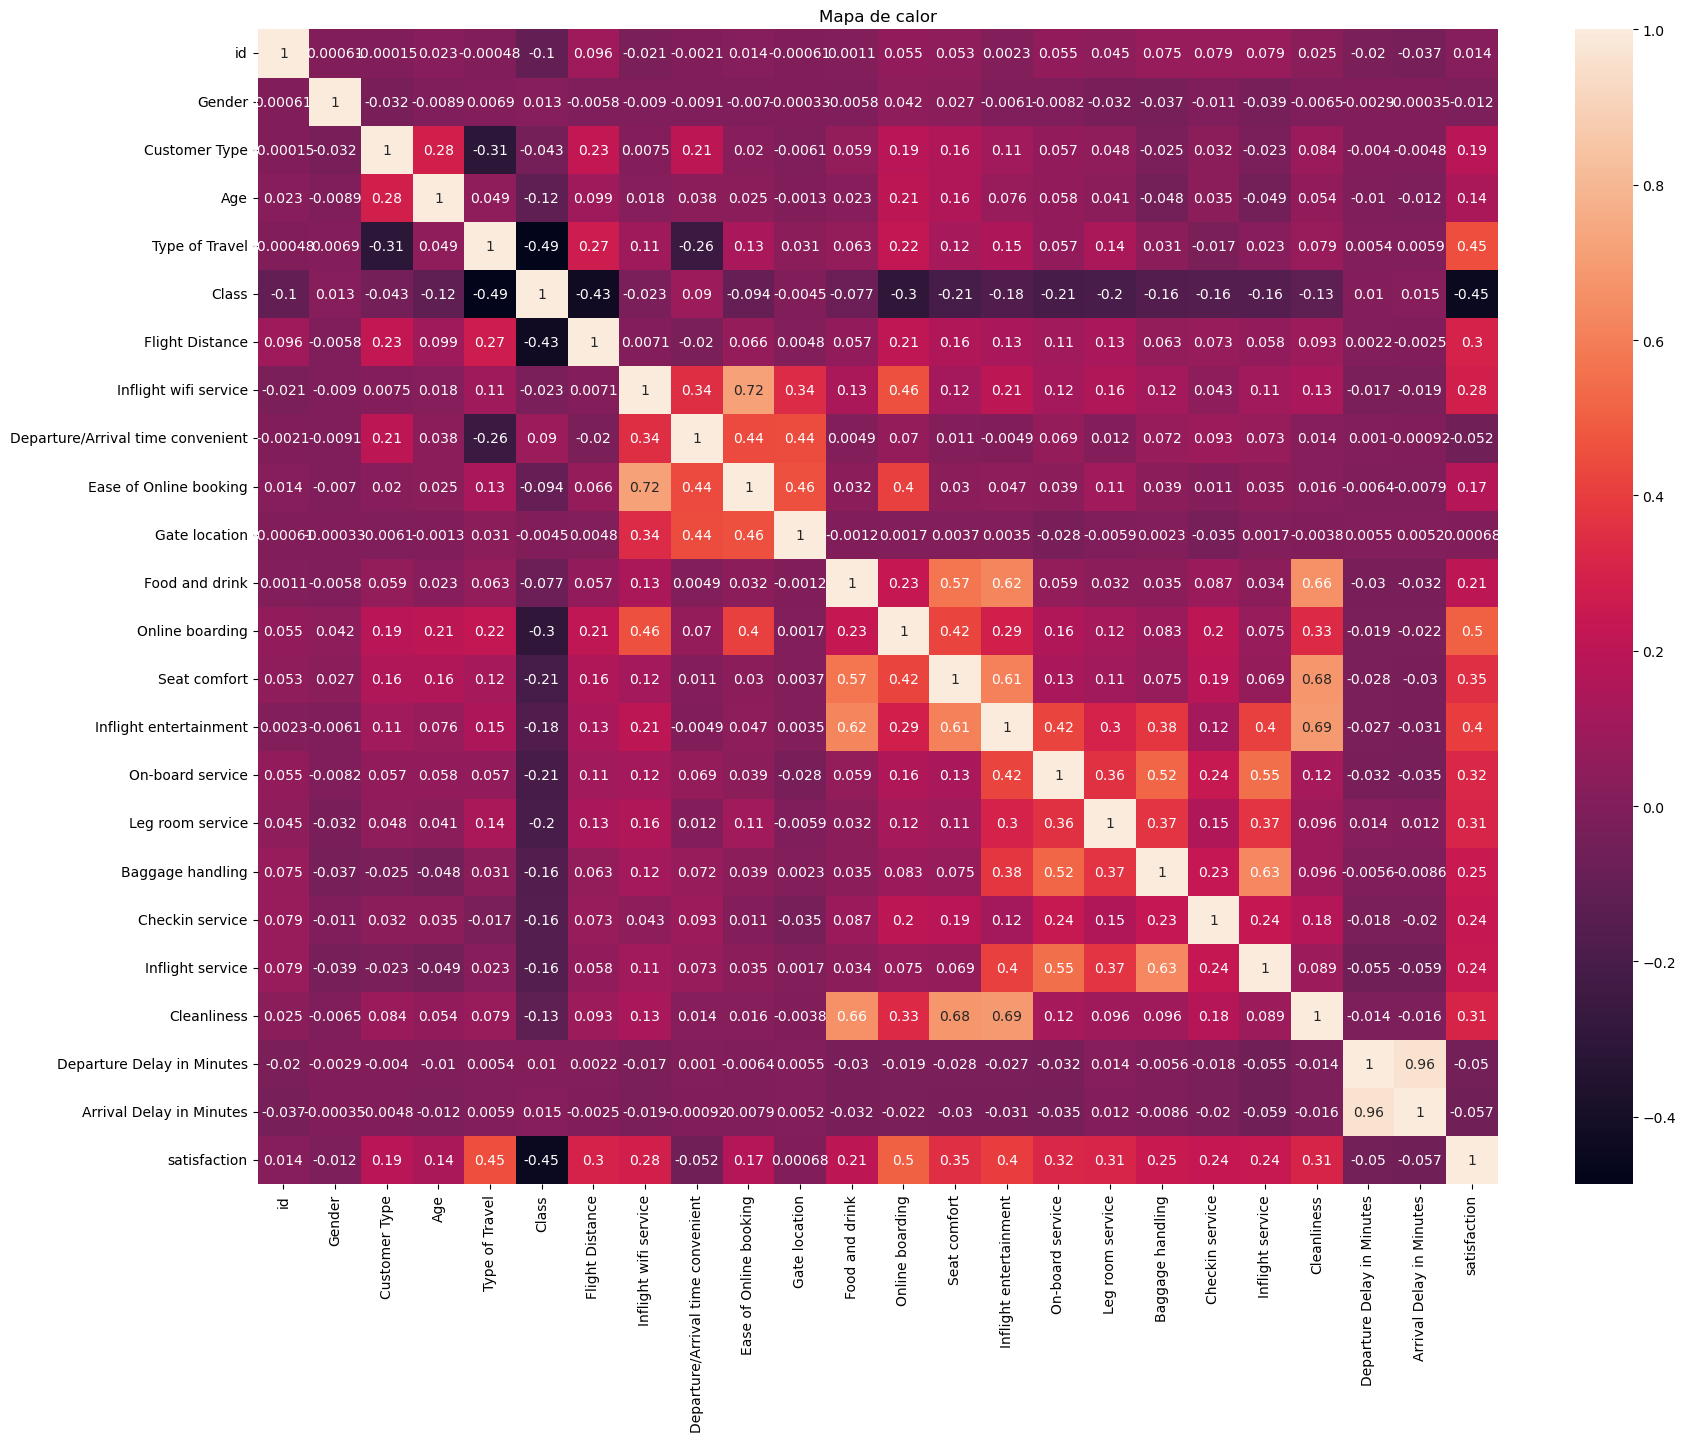

In [24]:
crelation = dset.corr()
plt.figure(figsize=(20,15))
sns.heatmap(crelation, annot=True)
plt.title('Mapa de calor')
plt.show()

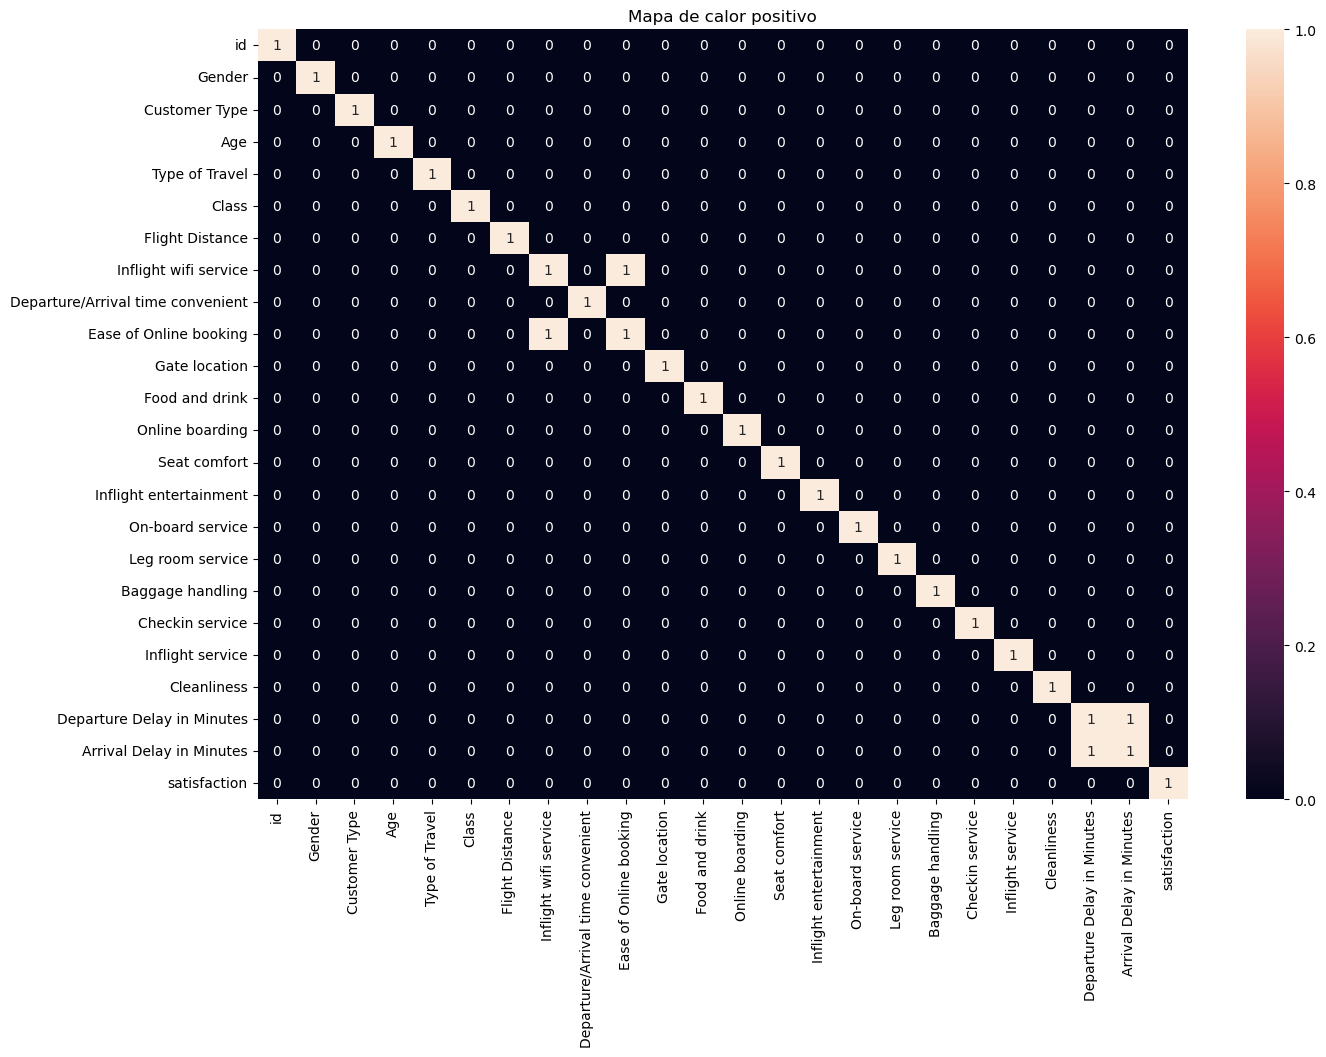

In [30]:
crelation = dset.corr()
crelation = (crelation>=0.7).astype('int')
plt.figure(figsize=(15,10))
plt.title('Mapa de calor positivo')
sns.heatmap(crelation, annot=True)
plt.show()

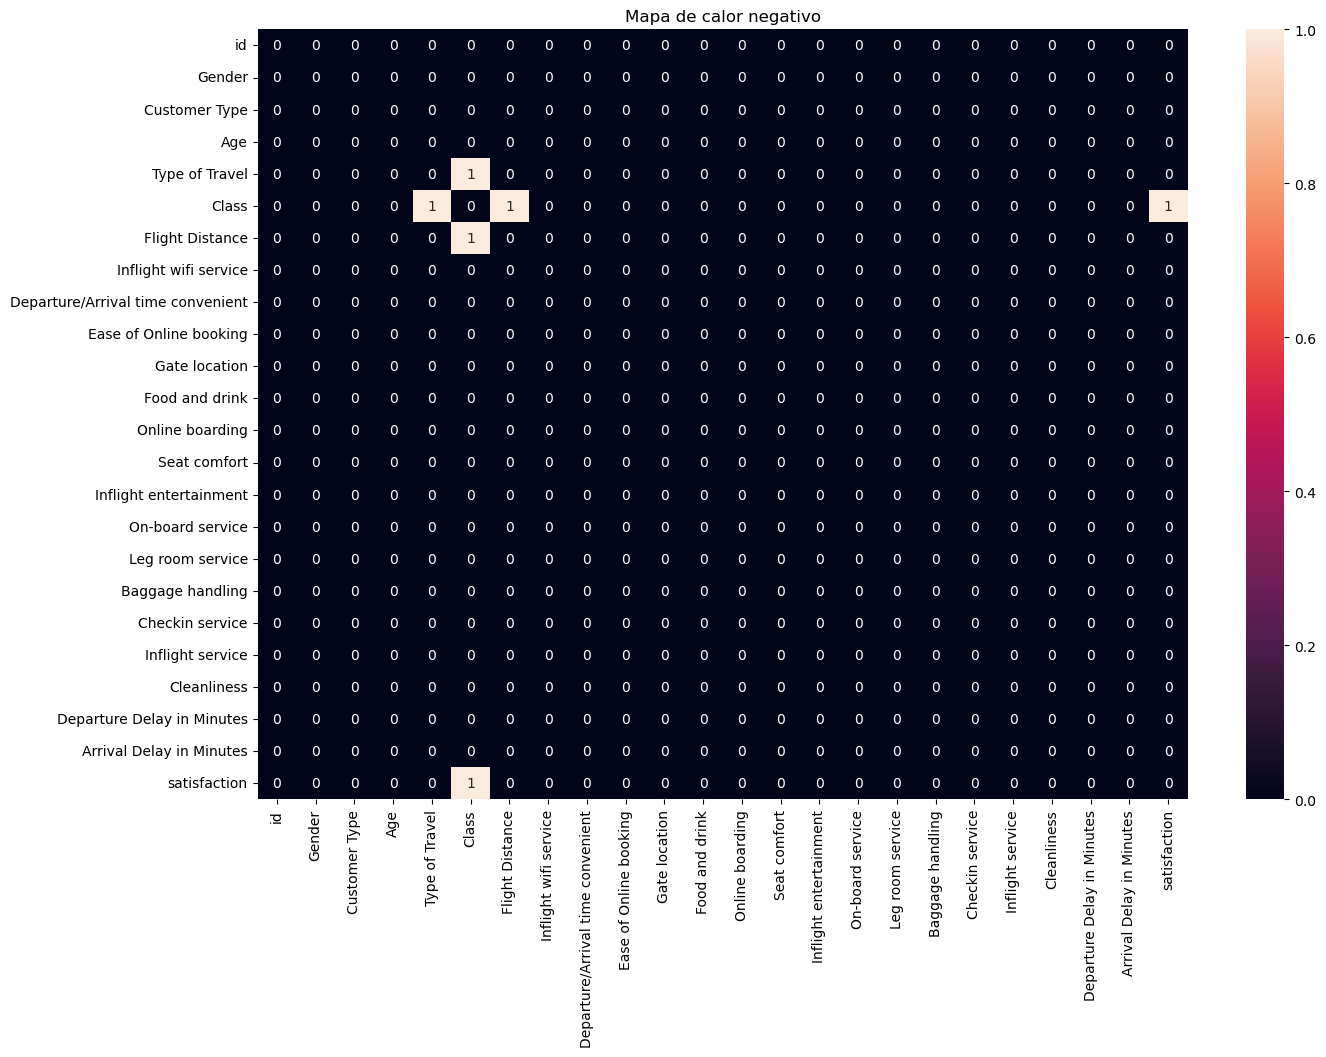

In [32]:
crelation = dset.corr()
crelation = (crelation<=-0.4).astype('int')
plt.figure(figsize=(15,10))
plt.title('Mapa de calor negativo')
sns.heatmap(crelation, annot=True)
plt.show()

### Outliers

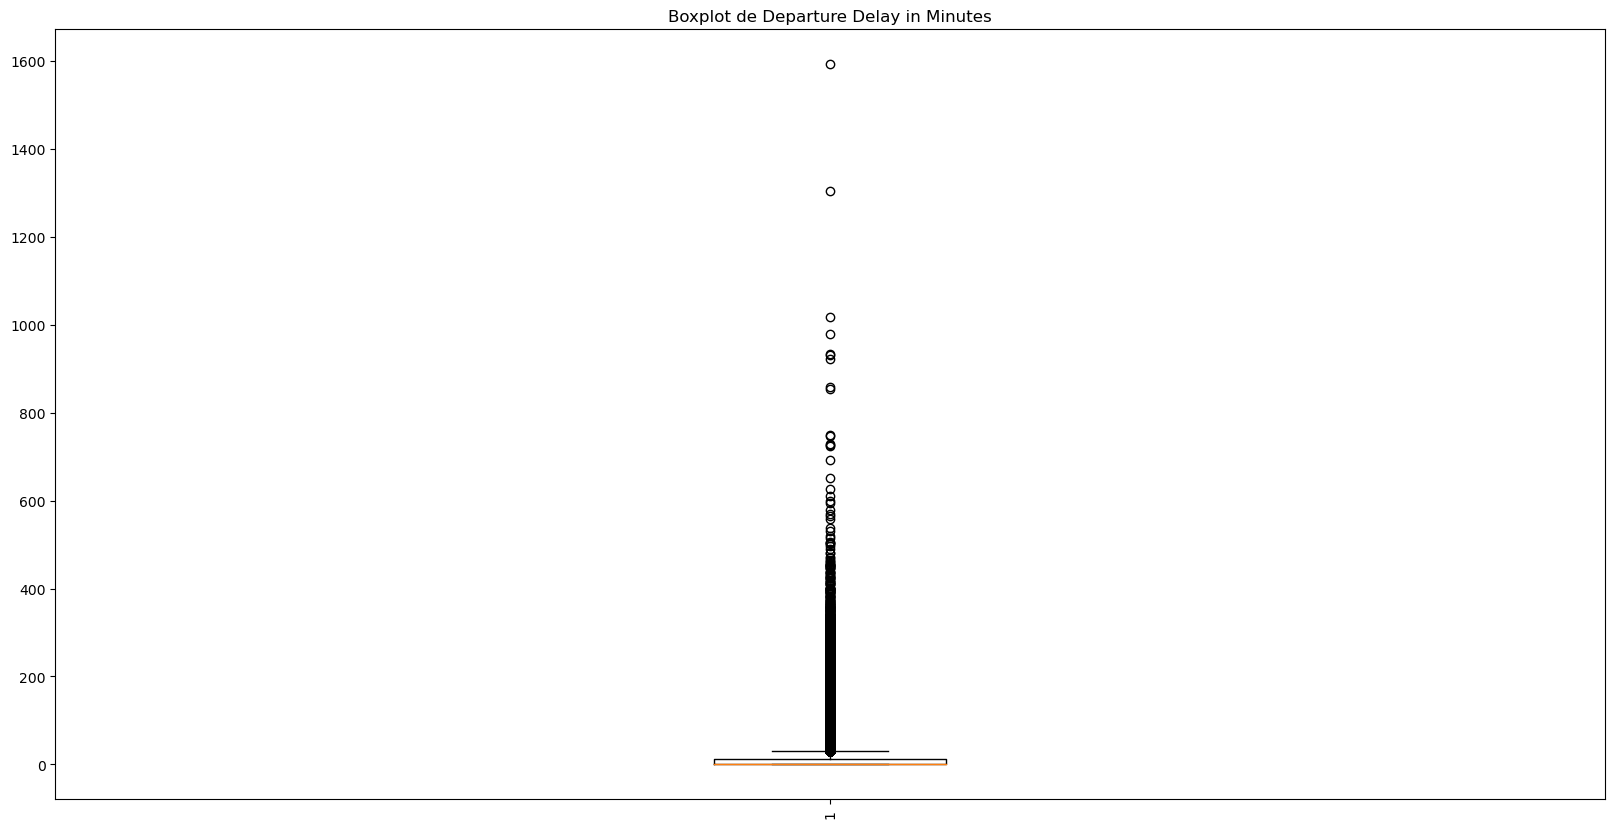

Valors atípics en la columna Departure Delay in Minutes:
14         43
16         49
22         52
24         54
32        109
         ... 
103869    212
103881     54
103885     47
103891     35
103892    110
Name: Departure Delay in Minutes, Length: 14529, dtype: int64
Quantitat de valors atípics en la columna Departure Delay in Minutes: 14529
Quantitat de valors iguals a 0 en la columna Departure Delay in Minutes: 58668


In [33]:
columna_interes = 'Departure Delay in Minutes'
data = dset[columna_interes]

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

plt.boxplot(data)
plt.title(f'Boxplot de {columna_interes}')
plt.show()

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

print(f'Valors atípics en la columna {columna_interes}:')
outliers_data = data[outliers]
print(outliers_data)
print(f'Quantitat de valors atípics en la columna {columna_interes}: {len(outliers_data)}')
count_zeros = (data == 0).sum()
print(f'Quantitat de valors iguals a 0 en la columna {columna_interes}: {count_zeros}')

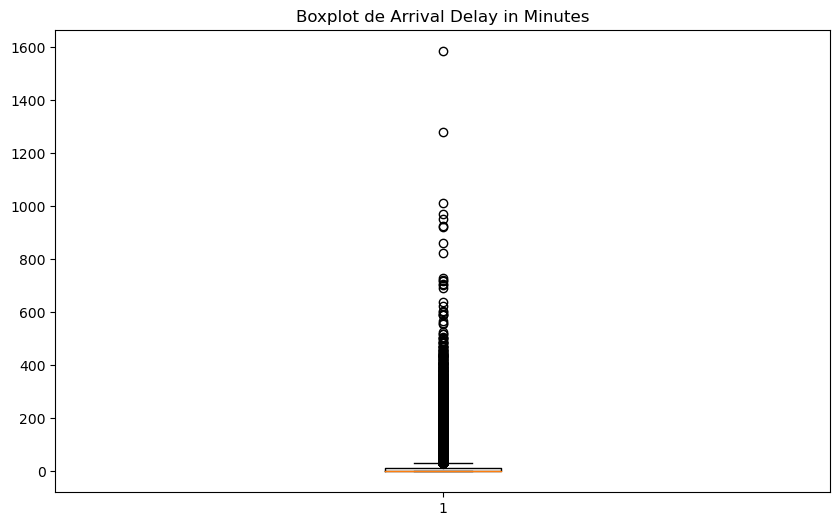

Valores atípicos en la columna Arrival Delay in Minutes:
14         35
16         51
24         44
32        120
55         48
         ... 
103843    156
103854     37
103869    206
103881     51
103892    121
Name: Arrival Delay in Minutes, Length: 13954, dtype: int64
Cantidad de valores atípicos en la columna Arrival Delay in Minutes: 13954
Cantidad de valores igual a 0 en la columna Arrival Delay in Minutes: 58469


In [34]:
columna_interes = 'Arrival Delay in Minutes'
data = dset[columna_interes]

plt.figure(figsize=(10, 6))

plt.boxplot(data)
plt.title(f'Boxplot de {columna_interes}')
plt.show()

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

print(f'Valores atípicos en la columna {columna_interes}:')
outliers_data = data[outliers]
print(outliers_data)
print(f'Cantidad de valores atípicos en la columna {columna_interes}: {len(outliers_data)}')
count_zeros = (data == 0).sum()
print(f'Cantidad de valores igual a 0 en la columna {columna_interes}: {count_zeros}')